# Description of the exercise:

## Author - Philip Tannor
### This is not an exercise in which the whole problem should be solved. This is meant for the preprocessing stage, and is meant to help you learn to use pandas groupby in an efficient manner.

# use these lines to read the data and get a basic feel for what they're like

In [2]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#2 alternative methods of reading the data
# df = pd.read_csv("https://rodeo-tutorials.s3.amazonaws.com/data/credit-data-non-null.csv")
df = pd.read_csv('resources/credit-data-non-null.csv')
df

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.000627,76,0,60.000000,0.0,5,0,0,0,0.0
149996,0,0.236450,29,0,349.000000,0.0,3,0,0,0,0.0
149997,0,0.037548,84,0,25.000000,1.0,5,0,0,0,0.0
149998,0,0.871976,50,0,4132.000000,0.0,11,0,1,0,3.0


serious_dlqin2yrs


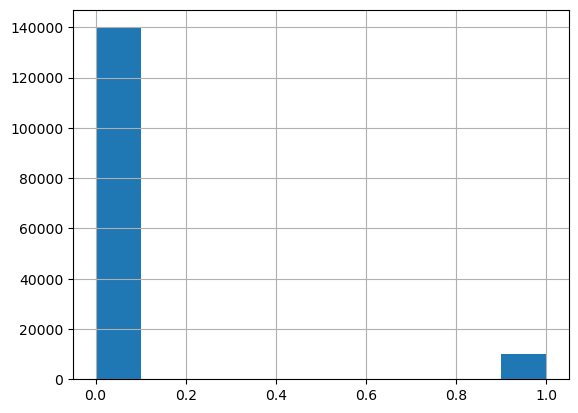

revolving_utilization_of_unsecured_lines


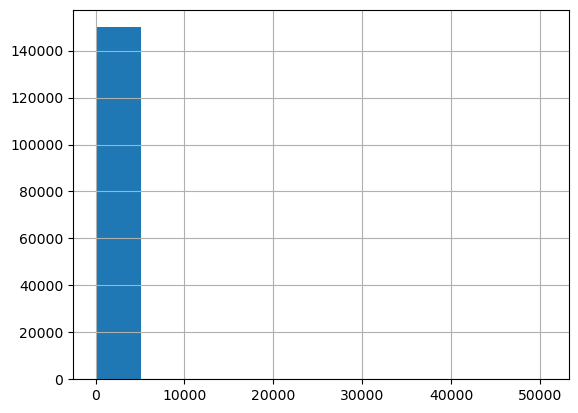

age


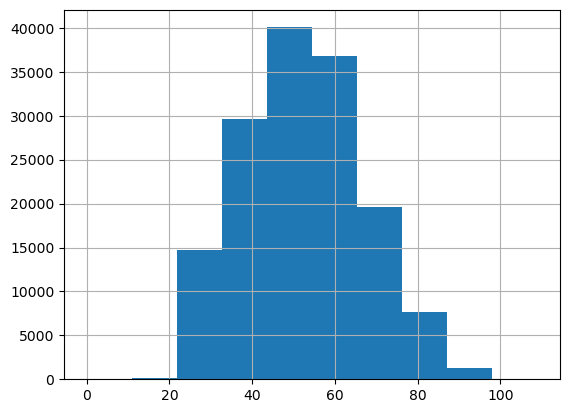

number_of_time30-59_days_past_due_not_worse


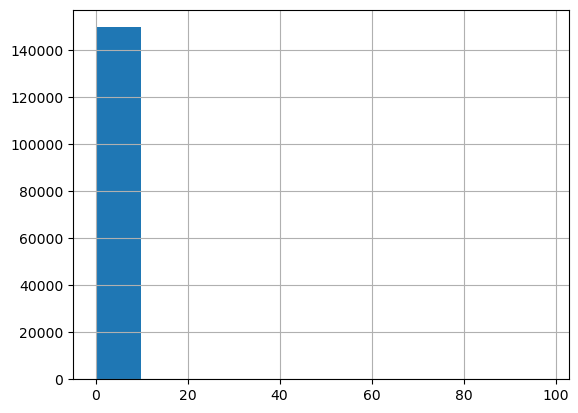

debt_ratio


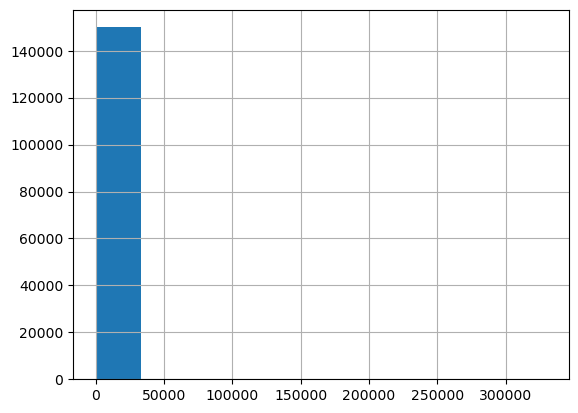

monthly_income


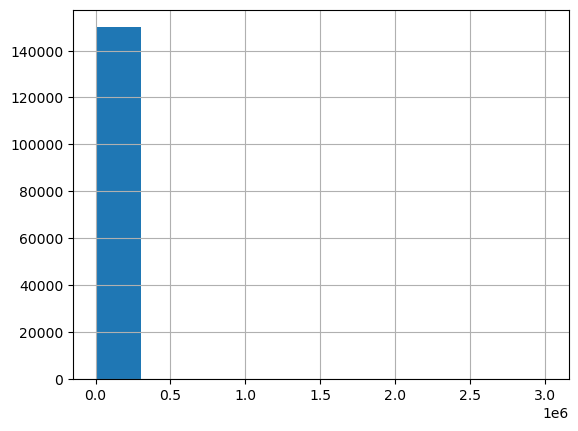

number_of_open_credit_lines_and_loans


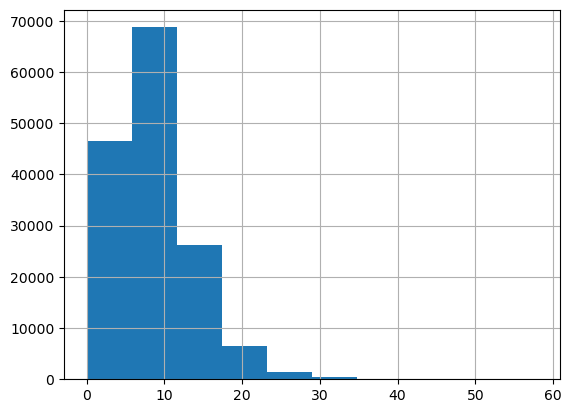

number_of_times90_days_late


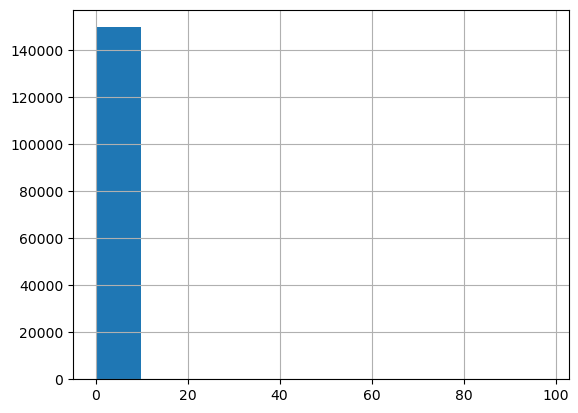

number_real_estate_loans_or_lines


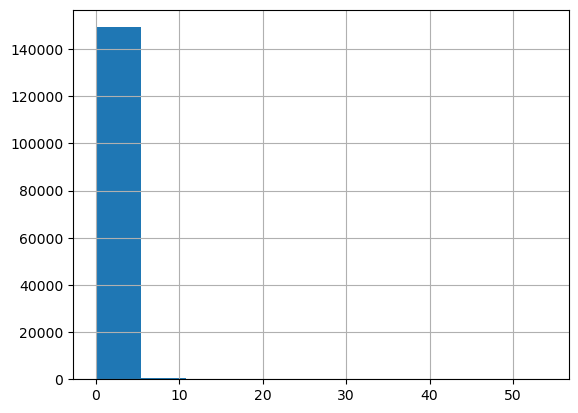

number_of_time60-89_days_past_due_not_worse


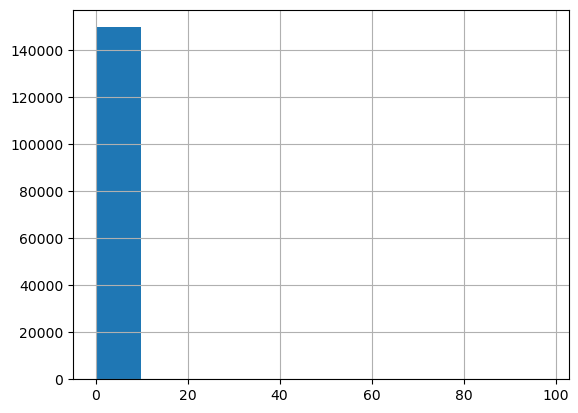

number_of_dependents


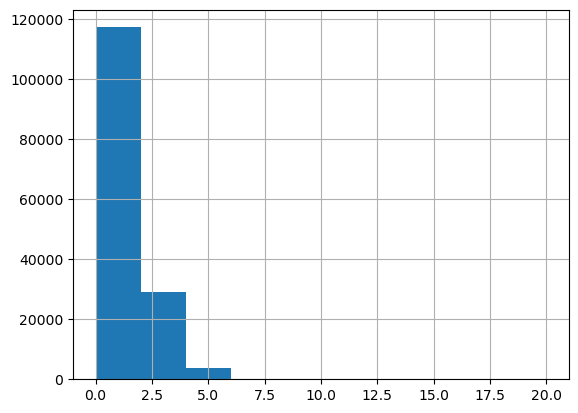

In [5]:
for col in df.columns:
    print(col)
    df[col].hist()
    plt.show()

# Now create a new groupby object, using .groupby
### start off by grouping by 'number_of_time30-59_days_past_due_not_worse'

In [12]:
grouped_df = df.groupby('number_of_time30-59_days_past_due_not_worse')

### Now we'll try to use functions which operate on the different groups. Start off with the simple ones: .sum(), .mean(), .max(), .count(). Calculate each one of these in a different cell.
### How are the records of the new DataFrame sorted?

### What happens if you try to see the "head" of the groupby object? Why? Try using len() on the original object, and then on .head(1), .head(2), etc...
### What if you try to use .iloc on it? or view the columns?

In [14]:
grouped_df.mean().head(1)

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
number_of_time30-59_days_past_due_not_worse,,,,,,,,,,
0,0.040002,6.314702,52.901133,352.306764,5394.66508,8.31428,0.049993,1.002952,0.0304,0.704018


### Now let's try more complicated aggregations. For this, we use .agg(), and in the brackets put the functions we want to use as a list. Try this with np.mean and np.sum. Notice that this will create a index with multiple levels. Find a way to reset the index to be like a regular, useful, DataFrame

In [22]:
grouped_df.agg([np.mean, np.sum]).reset_index(inplace= True)

### Now write 2 custom functions that calculate the 50th and 80th percentile of a pandas Series (using numpy). Add them to the list in the agg function. You should be calculating 4 features from each column in the next section

In [19]:
def percentile_50(series):
    return np.percentile(series, 50)

def percentile_80(series):
    return np.percentile(series, 80)

grouped_df.agg([np.mean, np.sum, percentile_50, percentile_80])


serious_dlqin2yrs        \
                                                         mean   sum   
number_of_time30-59_days_past_due_not_worse                           
0                                                    0.040002  5041   
1                                                    0.150253  2409   
2                                                    0.265115  1219   
3                                                    0.352338   618   
4                                                    0.425703   318   
5                                                    0.450292   154   
6                                                    0.528571    74   
7                                                    0.518519    28   
8                                                    0.320000     8   
9                                                    0.333333     4   
10                                                   0.750000     3   
11                                                   1.000000     1   
12                                                   0.500000     1   
13                                                   1.000000     1   
96                                                   0.800000     4   
98                                                   0.541667   143   

                                                                         \
                                            percentile_50 percentile_80   
number_of_time30-59_days_past_due_not_worse                               
0                                                     0.0           0.0   
1                                                     0.0           0.0   
2                                                     0.0           1.0   
3                                                     0.0           1.0   
4                                                     0.0           1.0   
5                                                     0.0           1.0   
6                                                     1.0           1.0   
7                                                     1.0           1.0   
8                                                     0.0           1.0   
9                                                     0.0           1.0   
10                                                    1.0           1.0   
11                                                    1.0           1.0   
12                                                    0.5           0.8   
13                                                    1.0           1.0   
96                                                    1.0           1.0   
98                                                    1.0           1.0   

                                            revolving_utilization_of_unsecured_lines  \
                                                                                mean   
number_of_time30-59_days_past_due_not_worse                                            
0                                                                           6.314702   
1                                                                           4.799930   
2                                                                           6.986531   
3                                                                           0.686111   
4                                                                           0.705853   
5                                                                           0.722890   
6                                                                           0.709392   
7                                                                           0.765867   
8                                                                           0.631323   
9                                                                           0.698176   
10                                                                          0.806120   
11                                  

### You must have noticed, that not all the features calculated are useful. Now we will calculate only some of these features, for some of the columns. This we can do by placing a dictionary into the .agg function in this format: {'name_of_column1': [func1, func2, ...], 'name_of_column2': [func3, func4, ...]}.

### Do this with the columns 'revolving_utilization_of_unsecured_lines' and 'age', and with 3 functions of your choice for each of them

In [23]:
df.groupby('number_of_time30-59_days_past_due_not_worse').agg({
    'revolving_utilization_of_unsecured_lines': [np.mean, np.sum, percentile_50],
    'age': [np.min, np.max, percentile_80]
})


revolving_utilization_of_unsecured_lines  \
                                                                                mean   
number_of_time30-59_days_past_due_not_worse                                            
0                                                                           6.314702   
1                                                                           4.799930   
2                                                                           6.986531   
3                                                                           0.686111   
4                                                                           0.705853   
5                                                                           0.722890   
6                                                                           0.709392   
7                                                                           0.765867   
8                                                                           0.631323   
9                                                                           0.698176   
10                                                                          0.806120   
11                                                                          0.993470   
12                                                                          0.648200   
13                                                                          0.998833   
96                                                                          1.000000   
98                                                                          1.000000   

                                                                          age  \
                                                       sum percentile_50 amin   
number_of_time30-59_days_past_due_not_worse                                     
0                                            795766.075191      0.119613   21   
1                                             76957.277579      0.398840    0   
2                                             32124.070342      0.631883   21   
3                                              1203.438486      0.749440   22   
4                                               527.272078      0.822862   26   
5                                               247.228444      0.834072   24   
6                                                99.314923      0.843440   26   
7                                                41.356806      0.905148   28   
8                                                15.783076      0.807309   34   
9                                                 8.378116      0.813388   28   
10                                                3.224481      0.791522   53   
11                                                0.993470      0.993470   51   
12                                                1.296401      0.648200   40   
13                                                0.998833      0.998833   48   
96                                                5.000000      1.000000   26   
98                                              263.999974      1.000000   21   

                                                                
                                            amax percentile_80  
number_of_time30-59_days_past_due_not_worse                     
0                                            109          66.0  
1                                             99          61.0  
2                                            101          59.0  
3                                             96          59.0  
4                                             92          59.0  
5                                             91          59.0  
6                                             77          60.0  
7                                             87          61.0  
8                                             81          64.0  
9                                             80   

### Now, we'll try to complete tasks which involve storing all of the information of the group. Use a lambda function in the .agg() to save all of the ages in each group as a sorted list (each element should contribute one age). Use the python function sorted() in the lambda function.

In [24]:
df.groupby('number_of_time30-59_days_past_due_not_worse').agg({'age': lambda x: sorted(x.tolist())})

,age
number_of_time30-59_days_past_due_not_worse,
0,"[21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 2..."
1,"[0, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22..."
2,"[21, 22, 23, 23, 23, 23, 23, 23, 23, 23, 24, 2..."
3,"[22, 22, 22, 22, 24, 24, 24, 24, 24, 24, 24, 2..."
4,"[26, 26, 26, 27, 27, 27, 27, 27, 28, 28, 28, 2..."
5,"[24, 26, 26, 27, 28, 28, 30, 30, 30, 30, 30, 3..."
6,"[26, 30, 31, 32, 32, 32, 33, 34, 34, 34, 35, 3..."
7,"[28, 28, 31, 32, 33, 35, 35, 36, 38, 41, 41, 4..."
8,"[34, 35, 36, 39, 40, 43, 46, 48, 48, 51, 51, 5..."


### Now, generate a new DataFrame named 'random_ages' with 2 columns, and length 100. One is a random value of 'number_of_time30-59_days_past_due_not_worse' between 0 and 5, and the other in a random age between 20 and 50. Use np.random.randint.

In [25]:
random_ages = pd.DataFrame({
    'number_of_time30-59_days_past_due_not_worse': np.random.randint(0, 6, size=100),
    'age': np.random.randint(20, 51, size=100)
})

random_ages

,number_of_time30-59_days_past_due_not_worse,age
0,3,32
1,2,38
2,5,22
3,5,50
4,0,24
...,...,...
95,2,37
96,0,27
97,1,20
98,4,26


### Now, we'll try to convert the new DataFrame into "age percentiles", using the previous DataFrames of  lists. For this, use .apply() on the new DataFrame, and in the .apply() use a library called 'bisect'. This library will help you find the location of a new element in a sorted list.

In [28]:
import bisect

def age_to_percentile(age, age_list):
    index = bisect.bisect_left(age_list, age)
    percentile = (index / len(age_list)) * 100
    return percentile

sorted_ages = sorted(random_ages['age'].unique())
random_ages['age_percentile'] = random_ages['age'].apply(lambda x: age_to_percentile(x, sorted_ages)).round(2)
random_ages


,number_of_time30-59_days_past_due_not_worse,age,age_percentile
0,3,32,40.00
1,2,38,60.00
2,5,22,6.67
3,5,50,96.67
4,0,24,13.33
...,...,...,...
95,2,37,56.67
96,0,27,23.33
97,1,20,0.00
98,4,26,20.00


### Now, we tried sorting just one column as a list. Lets go back to the original groupby object, and think of a reason why we might want an internal sorting of the whole group. Try to get the value of the 'revolving_utilization_of_unsecured_lines' of the oldest person in each group (record with highest age).
### This could be done in two different ways: using pandas Series sort_values within an apply function, or using the sort_values on the original DataFrame, before any groupby. Try both methods. Notice that in the second method, sort_values will have to sort by 2 columns (put their names in a list).

In [30]:
result_method_1 = df.groupby('age').apply(lambda x: x.sort_values(
    'revolving_utilization_of_unsecured_lines', ascending=False
    ).iloc[0]['revolving_utilization_of_unsecured_lines'])
result_method_1

age
0        1.000000
21       1.566866
22       1.413174
23       3.126246
24     638.000000
          ...    
102      0.109642
103      1.000000
105      0.003469
107      0.064748
109      0.246529
Length: 86, dtype: float64

In [31]:
result_method_2 = df.sort_values(
    ['age', 'revolving_utilization_of_unsecured_lines'], ascending=[True, False]
    ).groupby('age').first()['revolving_utilization_of_unsecured_lines']
result_method_2

age
0        1.000000
21       1.566866
22       1.413174
23       3.126246
24     638.000000
          ...    
102      0.109642
103      1.000000
105      0.003469
107      0.064748
109      0.246529
Name: revolving_utilization_of_unsecured_lines, Length: 86, dtype: float64

### Try applying groupby on the original DataFrame, inserting a list of more than one column (calculate something with it). How is it sorted? When should this be used?

In [34]:
df.groupby(['age', 'revolving_utilization_of_unsecured_lines'])['age'].count()

age  revolving_utilization_of_unsecured_lines
0    1.000000                                     1
21   0.000000                                    26
     0.007984                                     2
     0.008747                                     1
     0.016789                                     1
                                                 ..
103  1.000000                                     1
105  0.003469                                     1
107  0.064748                                     1
109  0.109307                                     1
     0.246529                                     1
Name: age, Length: 128918, dtype: int64

### Now parellelize any one of the calculations done, on the groupby object, in the previous cells. This may be accomplished with the map function on a pool from pathos.multiprocessing library (or similar). Notice this is easier on a linux machine (or via pycharm)

In [4]:
from multiprocessing import Pool

def calculate_sum(group):
    return group['monthly_income'].sum()

grouped = df.groupby('age')

def apply_calculation(group):
    return calculate_sum(group)

with Pool() as pool:
    results = pool.map(apply_calculation, [group for name, group in grouped])